<a href="https://colab.research.google.com/github/KojoBarbie/wordcould_practice/blob/main/make_wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Twitterからワードクラウドを作ろう
https://qiita.com/KojoBarbie/items/22ff2d829e335d5ab9ba にも載せてます。

## モジュールのインポート

In [ ]:
!pip install tweepy==4.0
!pip install janome
!pip install demoji
# 日本語フォントをインストール
!apt-get -y install fonts-ipafont-gothic
!rm /root/.cache/matplotlib/*.json

# Googleドライブをマウント
from google.colab import drive
drive.mount('/content/drive')

import tweepy
from pprint import pprint
import re
import demoji
from janome.tokenizer import Tokenizer
import collections
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 60 kB 3.4 MB/s 
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.7 MB 76.6 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 1.2 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic f

## tweetの取得

参考  
https://qiita.com/tappypuppy/items/55c99a60c22b7cc1d560

In [ ]:
# twitterIDの定義
# idの取得は https://tweeterid.com/
user_id = 1507001001576112130

In [ ]:
# tweepyのclientを作成する
consumer_key = "API keyを入れる"  
consumer_secret = "API key Secretを入れる"
access_token = "Access Tokenを入れる"
access_token_secret = "Access Token Secretを入れる"
Bearer_Token = "Bearer Tokenを入れる"

client = tweepy.Client(
    Bearer_Token, consumer_key, consumer_secret, 
    access_token, access_token_secret,
    # return_type = dict
)

In [ ]:
# tweetを取得し、txtファイルに出力
UsersTweets = client.get_users_tweets(user_id, max_results =100)

outputs = ""
for tweet in UsersTweets.data:
    print("Tweet text:", tweet.text)
    outputs += tweet.text.replace("\n", "<br>") + "\n"

f = open('/content/drive/MyDrive/wordcloud/watashi.txt', 'w', encoding='UTF-8')
f.write(outputs)
f.close()

Tweet text: またpythonでいろいろ作ってみたので後で記事書きます！
最近は作ったものをどんどんアウトプット出来てるのでとてもよき！
Tweet text: またqiitaで記事を書きました！今回はSlackアプリの作り方です！ https://t.co/x9o0qpdSwF
Tweet text: そういえば、この前一本記事書いたので上げておきます！
もう少し落ち着いたら続編も書こうかと思います笑
https://t.co/aE8NSIBew8
Tweet text: RT @oreilly_japan: 【6月21日発売】最新刊プレゼントキャンペーン
➡下記書籍を抽選で3名様に＼プレゼント／
✅応募方法
❶当アカウントをフォロー❷このツイートをRT
応募締切6/27まで／当選連絡はDM

『リーダーの作法』
https://t.co/1c5…
Tweet text: 今夜頑張ってqiitaに上げたいな
Tweet text: 興味のあった画像分類をやってみました(めっちゃ時間かかったけど…)
Tweet text: とりあえず今学んでるJavaとpythonで一つずつ、なんでもいいから何か作ろう…
Tweet text: @shukatsu_motsu そうですよね！試しに応募してみます！ありがとうございます🙇‍♂️
Tweet text: この前久しぶりにatcoderやりました！
C問題ギリギリ解けなくて悔しかった…
Tweet text: サマーインターン応募したいけど、まともな成果物がないorまとめてないので、ちょっと厳しいかな…？
Tweet text: 今まで触ったことのある言語は、

・python
・html/css/js
・Java

くらいですかね
pythonメインでやりつつ、Javaなども頑張ります！
Tweet text: とりあえず仮で…！笑
Tweet text: #新しいプロフィール画像 https://t.co/rQbr6s7DdX
Tweet text: よろしくお願いします！
atcoder一緒に勉強できる環境がほしくて始めました！


## 形態素解析
絵文字やリンクなどいらないものを消してから、形態素解析を行う。

In [ ]:
# txtファイルの読み込み
filename = '/content/drive/MyDrive/wordcloud/watashi.txt'

In [ ]:
# textをきれいにする関数
def clean_text(text):
  print("before: " + text)
  # リンクを消す
  text = re.sub(r"(https?|ftp)(:\/\/[-_\.!~*\'()a-zA-Z0-9;\/?:\@&=\+\$,%#]+)", "" , text)
  # 絵文字を消す
  text = demoji.replace(string=text, repl="")
  # 改行を消す
  text = text.replace('<br>', ' ')
  text = text.replace('\n', ' ')
  # メンションも消しておく
  text = re.sub('@\S*\s', '', text)
  print("after: " + text)
  return text

In [ ]:
# cleaningを行い、形態素解析をする
t = Tokenizer()

array = []
with open(filename, 'r') as input:
  f = input.readlines()
  for i in range(len(f)):
    if f[i].find("RT") == -1:
      text = clean_text(f[i])
      array.append(text)

before: またpythonでいろいろ作ってみたので後で記事書きます！<br>最近は作ったものをどんどんアウトプット出来てるのでとてもよき！

after: またpythonでいろいろ作ってみたので後で記事書きます！ 最近は作ったものをどんどんアウトプット出来てるのでとてもよき！ 
before: またqiitaで記事を書きました！今回はSlackアプリの作り方です！ https://t.co/x9o0qpdSwF

after: またqiitaで記事を書きました！今回はSlackアプリの作り方です！  
before: そういえば、この前一本記事書いたので上げておきます！<br>もう少し落ち着いたら続編も書こうかと思います笑<br>https://t.co/aE8NSIBew8

after: そういえば、この前一本記事書いたので上げておきます！ もう少し落ち着いたら続編も書こうかと思います笑  
before: 今夜頑張ってqiitaに上げたいな

after: 今夜頑張ってqiitaに上げたいな 
before: 興味のあった画像分類をやってみました(めっちゃ時間かかったけど…)

after: 興味のあった画像分類をやってみました(めっちゃ時間かかったけど…) 
before: とりあえず今学んでるJavaとpythonで一つずつ、なんでもいいから何か作ろう…

after: とりあえず今学んでるJavaとpythonで一つずつ、なんでもいいから何か作ろう… 
before: @shukatsu_motsu そうですよね！試しに応募してみます！ありがとうございます🙇‍♂️

after: そうですよね！試しに応募してみます！ありがとうございます 
before: この前久しぶりにatcoderやりました！<br>C問題ギリギリ解けなくて悔しかった…

after: この前久しぶりにatcoderやりました！ C問題ギリギリ解けなくて悔しかった… 
before: サマーインターン応募したいけど、まともな成果物がないorまとめてないので、ちょっと厳しいかな…？

after: サマーインターン応募したいけど、まともな成果物がないorまとめてないので、ちょっと厳しいかな…？ 
before: 今まで触ったことのある言語は、<br><br>・python<br

In [ ]:
# 形態素解析
t = Tokenizer()
exclusion = []
words = []

for text in array:
  for token in t.tokenize(text):
    p = token.part_of_speech
    if "名詞" in p:
    #if "名詞" in p or p.find("動詞") == 0:
      words.append(token.surface)

print(words)

['python', '記事', '最近', 'もの', 'アウトプット', 'qiita', '記事', '今回', 'Slack', 'アプリ', '作り方', '前', '一', '本', '記事', '続編', '笑', '今夜', 'qiita', '興味', '画像', '分類', '(', '時間', ')', '今', 'Java', 'python', '一つ', 'なん', '何', '試し', '応募', '前', '久しぶり', 'atcoder', 'C', '問題', 'ギリギリ', 'サマー', 'インターン', '応募', 'まとも', '成果', '物', 'or', '今', 'こと', '言語', 'python', 'html', '/', 'css', '/', 'js', 'Java', 'python', 'メイン', 'Java', '仮', '笑', '#', 'プロフィール', '画像', 'お願い', 'atcoder', '一緒', '勉強', '環境']


## ワードクラウドを作る
形態素ごとに頻度分析を行ってから、ワードクラウドとして出力

In [ ]:
output_path = "/content/drive/MyDrive/wordcloud/wordcloud_watashi.png"

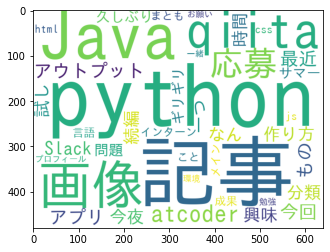

In [ ]:
# ワードクラウドの生成
wc = WordCloud(background_color="white",
    font_path='/usr/share/fonts/truetype/fonts-japanese-gothic.ttf', # Colaboratory
    width=640,height=480)
word = " ".join(words)
wc.generate(word)
wc.to_file(output_path)

# 画像を読込み配列変換し変数に格納
array_obj = plt.imread(output_path)
# 画像の表示
plt.imshow(array_obj)